# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Assignment 7

#### Yogendra Singh  &emsp;  214161014 <br><br> M Shanmukh Rao &emsp;   214161004

In [1]:
import pandas as pd

#loading the train data
df = pd.read_csv ('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#droping the label column from the dataframe and storing it in y
y=df['label']
df=df.drop('label',axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=42)

In [4]:
X_train.shape

(37800, 784)

In [5]:
y_train.shape

(37800,)

In [6]:
X_test.shape

(4200, 784)

In [7]:
y_train=y_train.tolist()

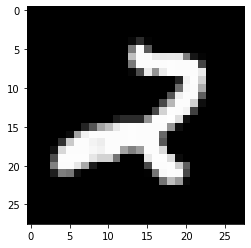

2


In [8]:
import matplotlib.pyplot as plt
import numpy as np

#check
i=6
gd = X_test.iloc[i].to_numpy().reshape(28,28)
plt.imshow(gd,interpolation="none",cmap="gray")
plt.show()

print(y_test.iloc[i])

# <br><br><b>1.PCA

In [9]:
#calculating the mean of each dimension of the training data
mu = X_train.mean(axis=0)
mu = mu.to_numpy().reshape((1,784))
mu.shape

(1, 784)

In [10]:
#Zero-Centering of Input Data Set 
y1=X_train-mu
y1.shape

(37800, 784)

In [11]:
#computing the covariance matrix
C=np.cov(y1.T)
C.shape

(784, 784)

In [12]:
from numpy.linalg import eig

#computing the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = eig(C)

In [13]:
eigenvalues.shape

(784,)

In [14]:
eigenvectors.shape

(784, 784)

In [15]:
def PCA(eigenvectors,y1,d):
    #taking the top d eigenvectors
    Q=eigenvectors[:,:d]
    #projecting the training data to a lower dimension 
    v=np.dot(Q.T,y1.T).T
    return Q,v

# <br><br>2. KD Tree

In [16]:
#creating a class Node for each node in the tree
class Node:
    def __init__ (self,D,i,m,lb):
        self.left=None
        self.data=D
        self.label=lb
        self.ind=i
        self.med=m
        self.right=None

In [17]:
#function to create the KD tree
def KDTree(root,depth, depth_max,m):
    v= root.data
    lb=root.label
    theta = root.med
    j=root.ind
    if depth<depth_max and len(v)>m:
        Dr=[]
        lr=[]
        Dl=[]
        ll=[]
        for i in range(len(v)):

            if v[i,j]>=theta:
                Dr.append(v[i,:])
                lr.append(lb[i])
            else:
                Dl.append(v[i,:])
                ll.append(lb[i])
        Dr=np.array(Dr)
        Dl=np.array(Dl)
        vr=Dr.var(axis=0)
        vl=Dl.var(axis=0)
        jr=np.argmax(vr)
        jl=np.argmax(vl)
        thetar=statistics.median(Dr[:,jr])
        thetal=statistics.median(Dl[:,jl])
        root.right=Node(Dr,jr,thetar,lr)
        root.left=Node(Dl,jl,thetal,ll)
        depth=depth+1
        root.right=KDTree(root.right,depth, depth_max,m)
        root.left=KDTree(root.left,depth, depth_max,m)
    return root

# <br><br>3. Image Search

In [43]:
def ImageSearch(X_test,y_test,root,k):
    #extracting one sample from test data
    img=X_test.iloc[2,:]
    img = img.to_numpy().reshape((1,784))
    img1=img-mu
    v1=np.dot(Q.T,img1.T).T
    
    temp=root
    
    #traversing the tree based on the hash functions
    while temp.right!=None or temp.left!=None:
        if v1[0,temp.ind]>=temp.med:
            temp=temp.right
        else:
            temp=temp.left
    D1=temp.data
    l1=temp.label
    dist=[]
    
    #calculating the euclidian distance
    for i in range(len(D1)):
        dist.append(np.linalg.norm(D1[i,:] - v1[0,:]))
    dist=np.array(dist)
    idx = np.argpartition(dist, k)
    idx = idx[:k]
    
    #extracting the top k data points and their corresponding labels
    T=D1[idx,:]
    l1=np.array(l1)
    Tl=l1[idx]
    
    #extracting the test label from test data
    imglbl=y_test.iloc[2]
    
    #calculating the search precision
    count=0
    for i in range(k):
        if Tl[i]==imglbl:
            count+=1
    print("Search Precision: ",(count*100)/k)
    return T,Tl,img,imglbl

<br><br><b>Search Precision for $d=400, D_{max}=3, m=600,k=5$

In [44]:
d=400
Q,v=PCA(eigenvectors,y1,d)
Q.shape

(784, 400)

In [45]:
v.shape

(37800, 400)

Search Precision:  100.0


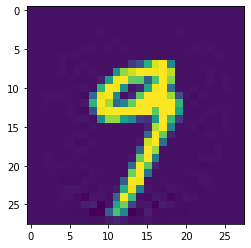

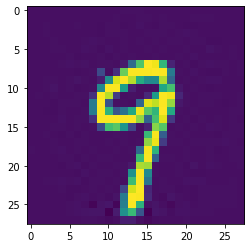

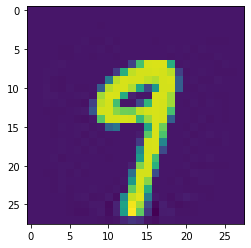

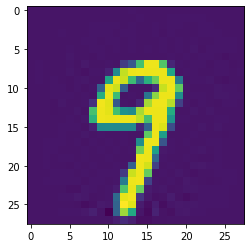

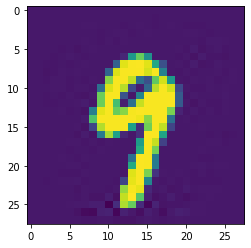

In [46]:
variance=v.var(axis=0)
j=np.argmax(variance)

import statistics
theta=statistics.median(v[:,j])

root=Node(v,j,theta,y_train)

depth_max =3
m=600
k=5
root=KDTree(root,0, depth_max,m)

D,L,img,imglbl=ImageSearch(X_test,y_test,root,k)

for i in range(D.shape[0]):
    for j in range (D.shape[1]):
        D[i][j]=D[i][j].real
D1=np.matmul(D,Q.T)+mu
for i in range(D1.shape[0]):
    plt.figure()
    plt.imshow(D1[i].reshape(28,28))

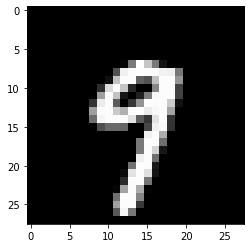

9


In [47]:
gd = img.reshape(28,28)
plt.imshow(gd,interpolation="none",cmap="gray")
plt.show()

print(imglbl)

<br><br><b>Search Precision for $d=300, D_{max}=5, m=10,k=600$

In [40]:
d=300
Q,v=PCA(eigenvectors,y1,d)
Q.shape

(784, 300)

In [41]:
v.shape

(37800, 300)

In [24]:
variance=v.var(axis=0)
j=np.argmax(variance)

import statistics
theta=statistics.median(v[:,j])

root=Node(v,j,theta,y_train)

depth_max =5
m=10
k=6
root=KDTree(root,0, depth_max,m)

ImageSearch(X_test,y_test,root,k)

Search Precision:  100.0


In [ ]:
for i in range(k):
gd = X_test.iloc[i].to_numpy().reshape(28,28)
plt.imshow(gd,interpolation="none",cmap="gray")
plt.show()

print(y_test.iloc[i])

<br><br><b>Search Precision for $d=300, D_{max}=5, m=50,k=10$

In [ ]:
d=300
Q,v=PCA(eigenvectors,y1,d)
Q.shape

In [ ]:
v.shape

In [ ]:
variance=v.var(axis=0)
j=np.argmax(variance)

import statistics
theta=statistics.median(v[:,j])

root=Node(v,j,theta,y_train)

depth_max =5
m=50
k=10
root=KDTree(root,0, depth_max,m)

ImageSearch(X_test,y_test,root,k)